## Bibliotheken/Pakete importieren

In [1]:
import pandas as pd
import gzip
import random
import collections
import nltk
from IPython.display import display, HTML
from nltk.text import Text
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
% matplotlib inline

## Daten laden und Word Cloud Funktionen

In [2]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

def word_cloud(text):

    WC = WordCloud(background_color='black', colormap='hsv',
                   width=800, height=400, min_font_size=10,
                   stopwords=stopwords)
    wordcloud = WC.generate(text)
    plt.figure(figsize=(12,8))
    plt.axis("off")
    plt.imshow(wordcloud, interpolation="quadric")

## Reviews und Stopwords laden

In [3]:
df = getDF('reviews_Video_Games_5.json.gz')
#Stopwords
with open('stopwords.txt', 'r') as f:
    stopwords = f.readlines()
    stopwords = [w.replace('\n','') for w in stopwords]

## DataFrame anzeigen

In [4]:
display(df[:20])

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1.0,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4.0,Good rally game,1372550400,"06 30, 2013"
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1.0,Wrong key,1403913600,"06 28, 2014"
3,A1DLMTOTHQ4AST,0700099867,ampgreen,"[7, 10]","I got this version instead of the PS3 version,...",3.0,"awesome game, if it did not crash frequently !!",1315958400,"09 14, 2011"
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0,DIRT 3,1308009600,"06 14, 2011"
5,A2UTRVO4FDCBH6,0700099867,A.R.G.,"[0, 0]","Overall this is a well done racing game, with ...",4.0,"Good racing game, terrible Windows Live Requir...",1368230400,"05 11, 2013"
6,AN3YYDZAS3O1Y,0700099867,Bob,"[11, 13]",Loved playing Dirt 2 and I thought the graphic...,5.0,A step up from Dirt 2 and that is terrific!,1313280000,"08 14, 2011"
7,AQTC623NCESZW,0700099867,Chesty Puller,"[1, 4]",I can't tell you what a piece of dog**** this ...,1.0,Crash 3 is correct name AKA Microsoft,1353715200,"11 24, 2012"
8,A1QJJU33VNC4S7,0700099867,D@rkFX,"[0, 1]",I initially gave this one star because it was ...,4.0,A great game ruined by Microsoft's account man...,1352851200,"11 14, 2012"
9,A2JLT2WY0F2HVI,0700099867,D. Sweetapple,"[1, 1]",I still haven't figured this one out. Did ever...,2.0,Couldn't get this one to work,1391817600,"02 8, 2014"


In [5]:
#Top 10 Produkte
most_reviewed_products = df.groupby('asin')['reviewText'].count().sort_values(ascending=False)[:10].index.tolist()
most_reviewed_products_count = df.groupby('asin')['reviewText'].count().sort_values(ascending=False)[:10].tolist()

In [19]:
print("ID\tASIN\t\tCOUNT")
print("==\t====\t\t=====")
for index, (product, count) in enumerate(zip(most_reviewed_products, most_reviewed_products_count)):
    print(str(index+1) + '\t' + str(product) + '\t' + str(count))
index = int(input('Enter ID of of ASIN you want to analyze: '))

ID	ASIN		COUNT
==	====		=====
1	B00BGA9WK2	802
2	B0015AARJI	652
3	B007CM0K86	517
4	B002VBWIP6	465
5	B0009VXBAQ	447
6	B0050SYX8W	441
7	B000B9RI14	425
8	B00178630A	379
9	B007XVTR3K	365
10	B00005NZ1G	356
Enter ID of of ASIN you want to analyze: 8


## Text preprocessing und extract Aspects

In [20]:
def get_aspects(reviews, num_aspects=10):
    print('Tokenizing Reviews')
    words = nltk.word_tokenize(". ".join(reviews))
    print('Tagging Reviews')
    pos_words = nltk.pos_tag(words)
    nouns = ['NN', 'NNS' 'NNP', 'NNPS']
    print('Filtering stopwords & non-aplha characters')
    temp = [item[0].lower() for item in pos_words if item[1] in nouns and item[0].lower() not in stopwords and item[0].isalpha]
    print('Extracting {0} most common aspects'.format(num_aspects))
    aspects = [i[0] for i in collections.Counter(temp).most_common()[:num_aspects]]
    print('{0} most common aspects are: {1}'.format(num_aspects, aspects))
    return aspects

In [21]:
product = most_reviewed_products[index-1]
product_reviews = df[df['asin'] == product]['reviewText'].tolist()
aspects = get_aspects(product_reviews, 5)

Tokenizing Reviews
Tagging Reviews
Filtering stopwords & non-aplha characters
Extracting 5 most common aspects
5 most common aspects are: ['character', 'money', 'fun', 'auction', 'player']


## Texte zu den einzelnen Aspects anzeigen

In [22]:
NUM_EXAMPLES = 5
print("Displaying {0} Occurences Of Each Aspect From Review Text:".format(NUM_EXAMPLES))
print("========================================================\n")

words = Text(nltk.word_tokenize(". ".join(product_reviews)))
for aspect in aspects:
    print('{0}'.format(aspect.upper()))
    print('============')
    words.concordance(aspect, lines=NUM_EXAMPLES)
    print()

Displaying 5 Occurences Of Each Aspect From Review Text:

CHARACTER
Displaying 5 of 25 matches:
r information such as Lachdanan 's character and the hero from the first Diablo
graded . I do wish there were more character customization options available , 
 . You can play multiple different character classes , basically as a warrior (
her difficulty or with a different character class.Lastly , this game has also 
om the roll back , a day lost on a character that I was working on , and the la

MONEY
Displaying 5 of 25 matches:
o a way for Blizzard to rake in more money ( auction house ) . Still , people c
in their games especially where real money is concerned . Diablo 3 is evolved ,
dea why anyone would even spend real money on gear for their characters in this
Much has been said about the `` Real Money Auction House , '' that it 's the re
t gaming companies are in it to make money and will only spend just what is nee

FUN
Displaying 5 of 25 matches:
ecycled '' feel . Really , it 's jus

## Alle Sätze zu den Aspects extrahieren

In [23]:
def get_aspect_sentences(reviews, aspects):
    sentences = nltk.sent_tokenize(". ".join(reviews))
    sentences_with_aspects = [sentence for sentence in sentences if any(aspect in sentence for aspect in aspects)]
    
    aspects_dict = {aspect: [] for aspect in aspects}
    for sentence in sentences_with_aspects:
        for aspect in aspects:
            if aspect in sentence:
                aspects_dict[aspect].append(sentence)
    return aspects_dict

In [24]:
aspects_dict = get_aspect_sentences(product_reviews, aspects)

## Sentiment Analysis für jeden Aspect

In [25]:
aspect_sentiment = {aspect: [] for aspect in aspects}

for key, value in aspects_dict.items():
    count = 0
    positive, negative, neutral = 0, 0, 0
    
    for v in value:
        blob = TextBlob(v)
        if(blob.sentiment.subjectivity > 0.2): # Filter damit nur Meinungen angezeigt werden
            count += 1
            if(blob.sentiment.polarity > 0): positive += 1
            elif(blob.sentiment.polarity < 0): negative += 1
            else: neutral += 1
    
    pos_percent = (positive/count)*100
    neg_percent = (negative/count)*100
    neu_percent = (neutral/count)*100
    aspect_sentiment[key].extend([positive, negative, neutral])
    
    print('Aspect: {0}'.format(key.upper()))
    print('================')
    print('Positive: {0}%'.format(round(pos_percent,2)))
    print('Negative: {0}%'.format(round(neg_percent, 2)))
    print('Neutral: {0}%'.format(round(neu_percent, 2)))
    print()

Aspect: CHARACTER
Positive: 52.14%
Negative: 40.47%
Neutral: 7.39%

Aspect: MONEY
Positive: 54.39%
Negative: 41.52%
Neutral: 4.09%

Aspect: FUN
Positive: 61.87%
Negative: 36.33%
Neutral: 1.8%

Aspect: AUCTION
Positive: 57.14%
Negative: 40.48%
Neutral: 2.38%

Aspect: PLAYER
Positive: 42.07%
Negative: 55.52%
Neutral: 2.41%



## Pie Plots für jeden Aspect

Aspect: CHARACTER


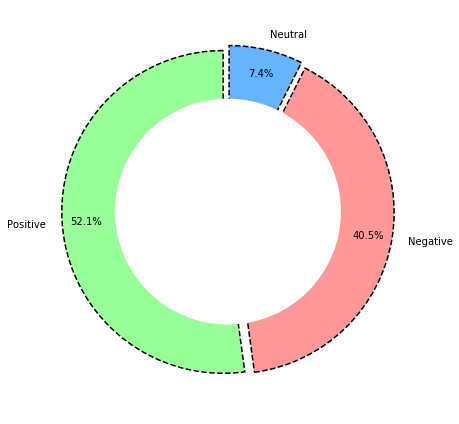

Aspect: MONEY


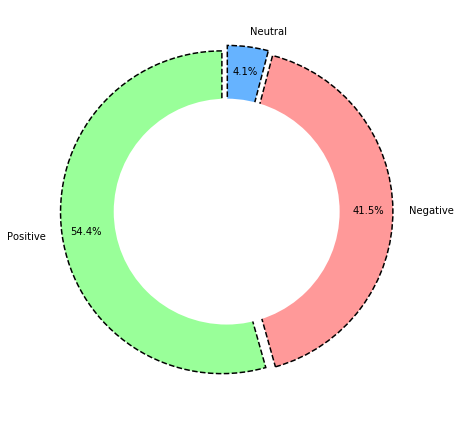

Aspect: FUN


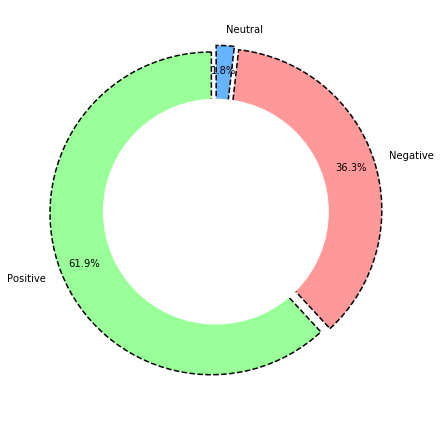

Aspect: AUCTION


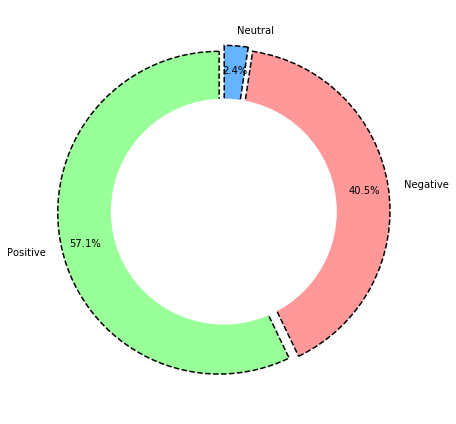

Aspect: PLAYER


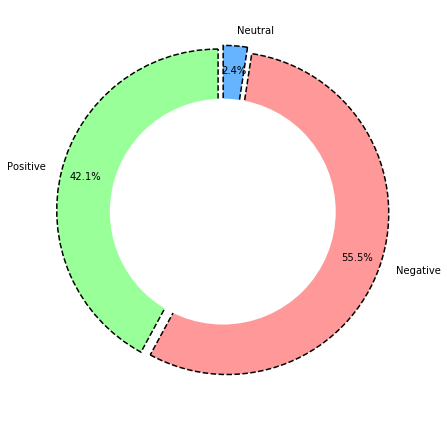

In [26]:
for index in range(len(aspects_dict.keys())):
    aspect = list(aspects_dict.keys())[index]
    
    print("Aspect: " + aspect.upper())
    print("================")
    # Pie chart
    labels = 'Positive', 'Negative', 'Neutral'
    sizes = aspect_sentiment[aspect]
    colors = ['#99ff99','#ff9999','#66b3ff']
    explode = (0.03,0.03, 0.03)
    plt.figure(figsize=(6,6))

    plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%',
            startangle=90, pctdistance=0.85, explode = explode,
            wedgeprops={"edgecolor":"k",'linewidth': 1.5, 'linestyle': 'dashed', 'antialiased': True})
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.tight_layout()
    plt.show()

## Word Cloud

In [14]:
print("ID\tASPECT")
print("==\t======")

for index, aspect in enumerate(aspects_dict.keys()):
    print(str(index+1) + '\t' + aspect.upper())
print()
index = int(input('Enter ID of of ASPECT you want to visualize in a wordcloud and pip plot: '))

ID	ASPECT
==	======
1	COLOR
2	BATTERY
3	PRICE
4	DESIGN
5	CABLE

Enter ID of of ASPECT you want to visualize in a wordcloud and pip plot: 2


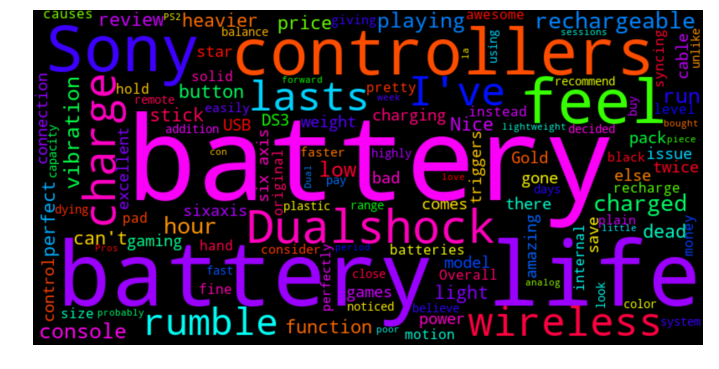

In [15]:
aspect = list(aspects_dict.keys())[index-1]
text = " ".join(aspects_dict[aspect])
word_cloud(text)